<a href="https://colab.research.google.com/github/Branddx/Reinforced-Learning/blob/main/Iteraci%C3%B3n_de_Politica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importar las librerias necesarias para la ejecución del Codigo**

El modulo laberinto debe colocarse en la misma ruta raiz del archivo


In [ ]:
from typing import Tuple, Dict, Optional, Iterable, Callable

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation

from laberinto import Maze

# **Funciones necesarias para observar el comportamiento del agente**

In [ ]:
def plot_policy(probs_or_qvals, frame, action_meanings=None):
    if action_meanings is None:
        action_meanings = {0: 'U', 1: 'R', 2: 'D', 3: 'L'}
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    max_prob_actions = probs_or_qvals.argmax(axis=-1)
    probs_copy = max_prob_actions.copy().astype(object)
    for key in action_meanings:
        probs_copy[probs_copy == key] = action_meanings[key]
    sns.heatmap(max_prob_actions, annot=probs_copy, fmt='', cbar=False, cmap='coolwarm',
                annot_kws={'weight': 'bold', 'size': 12}, linewidths=2, ax=axes[0])
    axes[1].imshow(frame)
    axes[0].axis('off')
    axes[1].axis('off')
    plt.suptitle("Policy", size=18)
    plt.tight_layout()


def plot_values(state_values,value,ax):
    # Limpiar el eje antes de volver a dibujar
    ax.clear()
    # Dibujar el heatmap sin la barra de color
    sns.heatmap(state_values, annot=True, fmt=".2f", cmap='coolwarm',
                annot_kws={'weight': 'bold', 'size': 12}, linewidths=2, ax=ax, cbar=False)
    # Eliminar los ejes
    ax.axis('off')
    plt.suptitle(f"Function value: {value}", size=18)
    # Actualizar el gráfico sin abrir una nueva ventana
    plt.draw()
    plt.pause(0.9)

def plot_maze(state,meanning,ax):
    frame = env.render(mode='rgb_array')  # Renderiza el entorno (asumiendo que 'env' está definido)

    ax.clear()  # Limpiar el gráfico actual (sin cerrar la ventana)
    ax.set_axis_off()  # Desactivar los ejes
    ax.set_title(f"State: {state}:{meanning}")  # Actualizar el título con el estado actual
    ax.imshow(frame)  # Mostrar el frame del laberinto

    plt.draw()  # Redibujar el gráfico
    plt.pause(0.5)  # Pausar para visualizar la actualización

import numpy as np
action_meanings = {0: 'arriba', 1: 'derecha', 2: 'abajo', 3: 'izquierda'}
#fig, ax = plt.subplots()
fig, axes = plt.subplots(1, 1, figsize=(8, 4))

# **Llamar el entorno y definir su politica**

In [ ]:
env = Maze()
state = env.reset()
frame = env.render(mode='rgb_array')

#La potica definida es equiprobable para todas las acciones (25% arriba,25% derecha,25% abajo,25% izquierda)
policy_probs = np.full((5, 5, 4), 0.25)

#Nos devuelve la probalidad de tomar una acción en cada estado
def policy(state):
    return policy_probs[state]
#Definimos en 0 el valor de los valores de estado
state_values = np.zeros(shape=(5,5))

# **Implementar el algoritmo de evaluación de politica iterativa**


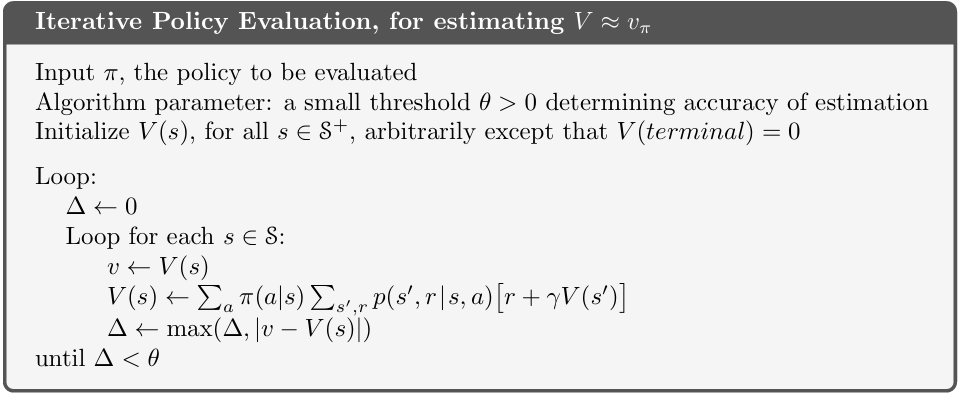

In [ ]:
def iterative_policy_evaluation(policy_probs, state_values, theta=1e-5, gamma=0.9):
    delta = float("inf")

    while delta > theta:
        delta = 0

        for row in range(5):
            for col in range(5):
                ant_value = state_values[(row, col)]
                new_value = 0
                action_probabilities = policy_probs[(row, col)]

                for action, prob in enumerate(action_probabilities):
                    next_state, reward, _, _ = env.simulate_step((row, col), action)
                    new_value += prob * (reward + gamma * state_values[next_state])
                if row == 4 and col == 4:
                    state_values[(row, col)]=0
                else:
                    state_values[(row, col)] = new_value
                    delta = max(delta, abs(ant_value - new_value))
        plot_values(state_values,round(delta, 3),axes)

# **Ejecutar el algoritmo de evaluación de politica iterativa**

In [ ]:
if __name__ == '__main__':
    iterative_policy_evaluation(policy_probs, state_values, theta=1e-6, gamma=0.9)
    plt.show()

# **Referencias**

> https://www.udemy.com/user/escape-velocity-labs-sl/

> Sutton, R. S. (2018). Reinforcement learning: An introduction. A Bradford Book.



